# Test Data Cleaning and Preprocessing

***

### Import Modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import r2_score


### Data Dictionary 

<details><summary>Ames Data Description</summary>
    
- [data description](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt)
</details>

### Read the data 

In [370]:
test = pd.read_csv('./datasets/test.csv')


In [42]:
#  read the cleanedd train dataset 
clean_train = pd.read_csv('./datasets/clean_train.csv')

In [317]:
pd.set_option('display.max_columns', 100)    
pd.set_option('display.max_rows', 500)


In [318]:
test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,NaN,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,NaN,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1935.0,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,0,785,1394,GasA,Gd,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.0,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [320]:
test.shape

(878, 80)

In [372]:
#  removing the ' ' from column names and adding '_'

test.columns = test.columns.str.replace(' ', '_')

In [183]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 77 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               878 non-null    int64  
 1   PID              878 non-null    int64  
 2   MS_SubClass      878 non-null    int64  
 3   MS_Zoning        878 non-null    object 
 4   Lot_Frontage     718 non-null    float64
 5   Lot_Area         878 non-null    int64  
 6   Street           878 non-null    object 
 7   Lot_Shape        878 non-null    object 
 8   Land_Contour     878 non-null    object 
 9   Utilities        878 non-null    object 
 10  Lot_Config       878 non-null    object 
 11  Land_Slope       878 non-null    object 
 12  Neighborhood     878 non-null    object 
 13  Condition_1      878 non-null    object 
 14  Condition_2      878 non-null    object 
 15  Bldg_Type        878 non-null    object 
 16  House_Style      878 non-null    object 
 17  Overall_Qual    

In [184]:
test.describe()

,Id,PID,MS_SubClass,Lot_Frontage,Lot_Area,Overall_Qual,Overall_Cond,Year_Built,Year_Remod/Add,Mas_Vnr_Area,BsmtFin_SF_1,BsmtFin_SF_2,Bsmt_Unf_SF,Total_Bsmt_SF,1st_Flr_SF,2nd_Flr_SF,Low_Qual_Fin_SF,Gr_Liv_Area,Bsmt_Full_Bath,Bsmt_Half_Bath,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,TotRms_AbvGrd,Fireplaces,Garage_Yr_Blt,Garage_Cars,Garage_Area,Wood_Deck_SF,Open_Porch_SF,Enclosed_Porch,3Ssn_Porch,Screen_Porch,Pool_Area,Misc_Val,Mo_Sold,Yr_Sold
count,878.000000,8.780000e+02,878.000000,718.000000,878.000000,878.000000,878.000000,878.000000,878.000000,877.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,833.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000
mean,1444.749431,7.162867e+08,58.268793,69.545961,10307.033030,6.050114,5.566059,1970.492027,1984.417995,106.236032,441.328018,53.896355,539.133257,1034.357631,1145.787016,348.398633,2.728929,1496.914579,0.439636,0.055809,1.539863,0.398633,2.879271,1.047836,6.454442,0.618451,1976.759904,1.742597,470.362187,93.430524,47.070615,24.064920,2.597950,14.830296,1.884966,48.498861,6.202733,2007.825740
std,850.838263,1.889103e+08,42.235407,23.533945,10002.674602,1.369065,1.128903,30.395895,20.450725,187.158908,438.457329,178.632355,426.172161,413.446291,375.264111,432.985566,32.572548,506.468967,0.529948,0.229683,0.559060,0.505927,0.830712,0.223966,1.596632,0.669571,25.689763,0.750391,212.734075,121.181702,68.180939,73.249463,24.962482,53.003794,29.916672,550.169317,2.642498,1.327861
min,2.000000,5.263021e+08,20.000000,21.000000,1477.000000,2.000000,1.000000,1880.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000,0.000000,407.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,692.250000,5.284841e+08,20.000000,59.000000,7297.250000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,216.000000,789.000000,864.000000,0.000000,0.000000,1114.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,322.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,1433.000000,5.354542e+08,50.000000,68.000000,9446.000000,6.000000,5.000000,1972.000000,1992.000000,0.000000,373.000000,0.000000,452.000000,975.000000,1063.000000,0.000000,0.000000,1436.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1978.000000,2.000000,473.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2197.500000,9.071904e+08,70.000000,80.000000,11589.000000,7.000000,6.000000,1999.750000,2003.000000,172.000000,734.750000,0.000000,780.000000,1247.000000,1358.000000,720.000000,0.000000,1779.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,170.750000,69.750000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2928.000000,1.007100e+09,190.000000,182.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1378.000000,2288.000000,1526.000000,2046.000000,2630.000000,2674.000000,2065.000000,481.000000,4476.000000,2.000000,1.000000,4.000000,2.000000,6.000000,3.000000,12.000000,3.000000,2010.000000,4.000000,1488.000000,690.000000,742.000000,1012.000000,360.000000,576.000000,555.000000,15500.000000,12.000000,2010.000000


### Missing data 

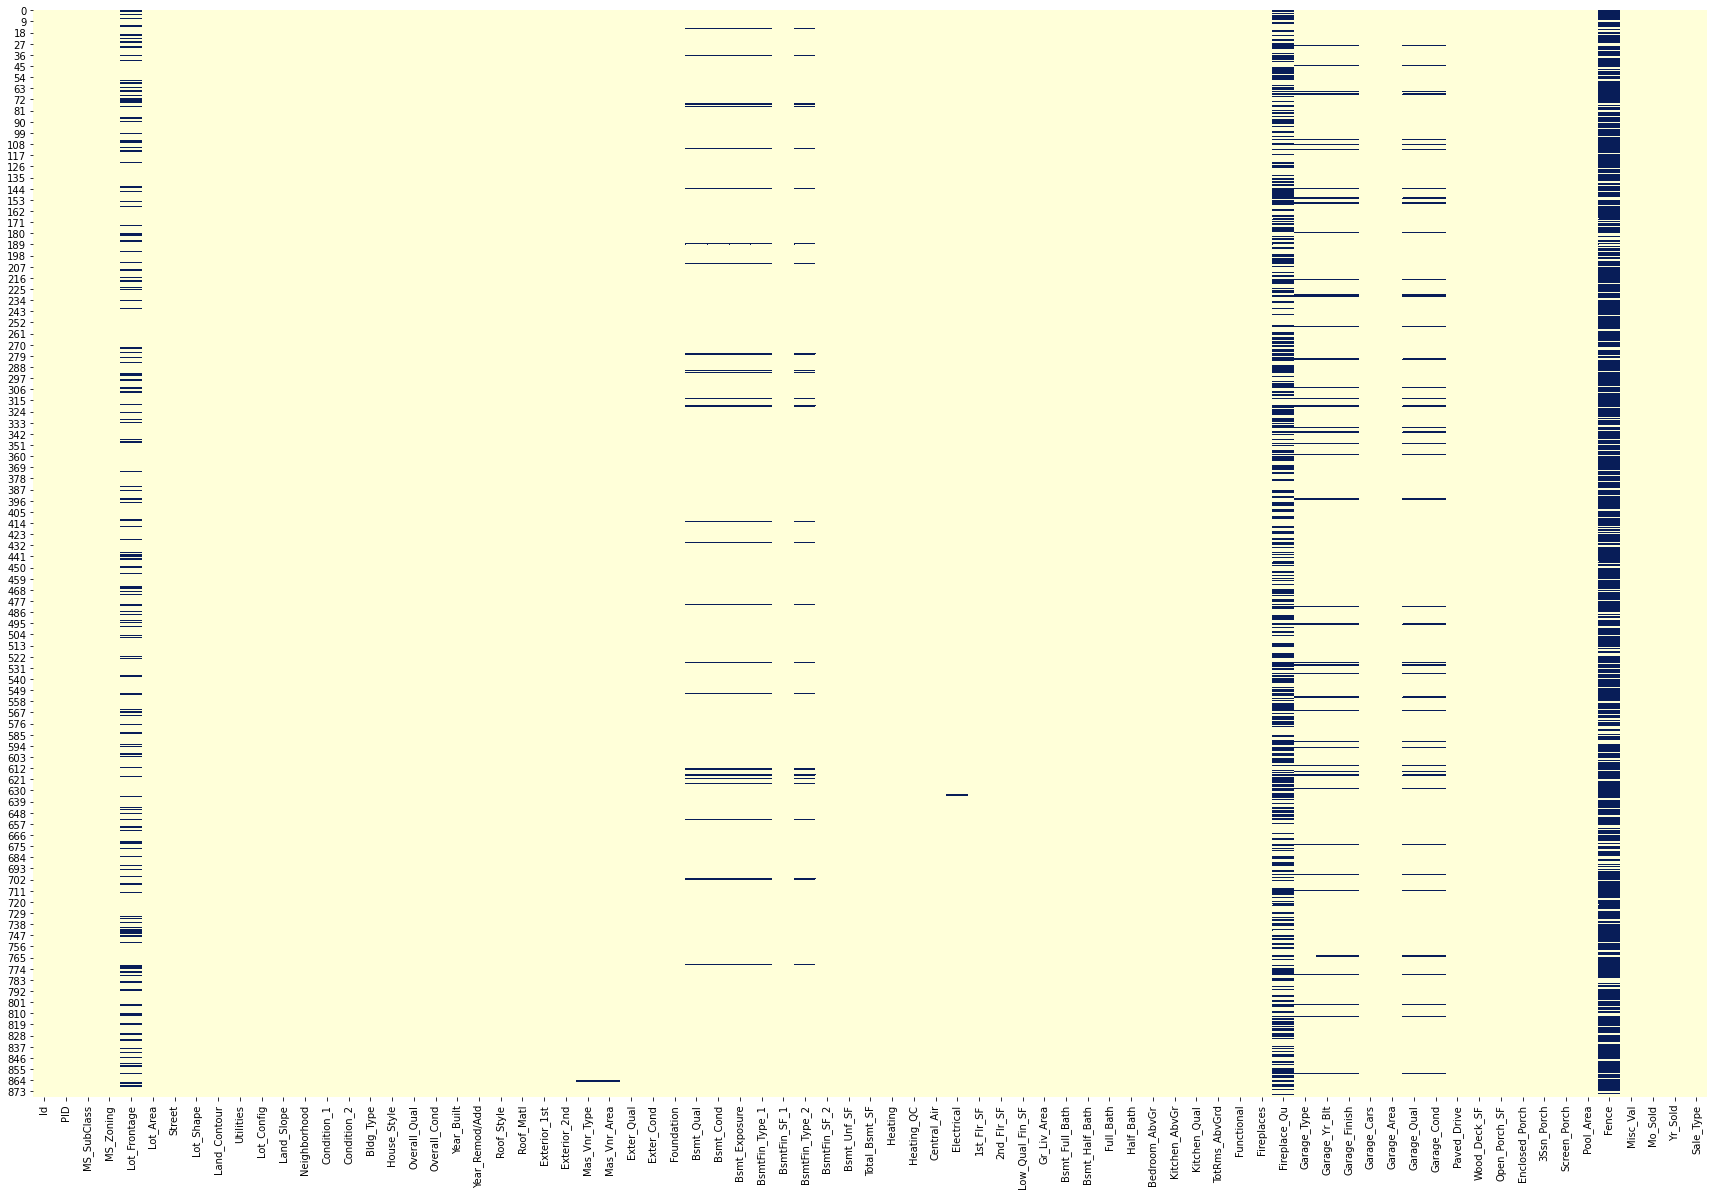

In [185]:
# We will use the Seaborn's Heatmap to visialize th emissing data in each variable.

plt.figure(figsize=(30,20))
sns.heatmap(test.isna(),
            cmap="YlGnBu",
            cbar = False)
plt.savefig("visualizing_missing_data_Test.png", dpi=100)

We can see from the heatmap, the horizontal bars corresponding to each column are the missing data for that row. Here Alley, Pool QC, Fence and Misc Feature have the most missing values.

In [186]:
test_null = test.isnull().sum()
test_null_filtered = test_null[test_null > 0]
print(test_null_filtered)

Lot_Frontage      160
Mas_Vnr_Type        1
Mas_Vnr_Area        1
Bsmt_Qual          25
Bsmt_Cond          25
Bsmt_Exposure      25
BsmtFin_Type_1     25
BsmtFin_Type_2     25
Electrical          1
Fireplace_Qu      422
Garage_Type        44
Garage_Yr_Blt      45
Garage_Finish      45
Garage_Qual        45
Garage_Cond        45
Fence             706
dtype: int64


In [187]:
 # percentage missing values in the Train dataset:

print((test_null_filtered/test.shape[0])*100)

Lot_Frontage      18.223235
Mas_Vnr_Type       0.113895
Mas_Vnr_Area       0.113895
Bsmt_Qual          2.847380
Bsmt_Cond          2.847380
Bsmt_Exposure      2.847380
BsmtFin_Type_1     2.847380
BsmtFin_Type_2     2.847380
Electrical         0.113895
Fireplace_Qu      48.063781
Garage_Type        5.011390
Garage_Yr_Blt      5.125285
Garage_Finish      5.125285
Garage_Qual        5.125285
Garage_Cond        5.125285
Fence             80.410023
dtype: float64


In [188]:
# listing all the variable that are not float or int in the Train dataset

test_object = test.dtypes
test_object_filtered = test_object[test_object == 'object']
print(test_object_filtered)

MS_Zoning         object
Street            object
Lot_Shape         object
Land_Contour      object
Utilities         object
Lot_Config        object
Land_Slope        object
Neighborhood      object
Condition_1       object
Condition_2       object
Bldg_Type         object
House_Style       object
Roof_Style        object
Roof_Matl         object
Exterior_1st      object
Exterior_2nd      object
Mas_Vnr_Type      object
Exter_Qual        object
Exter_Cond        object
Foundation        object
Bsmt_Qual         object
Bsmt_Cond         object
Bsmt_Exposure     object
BsmtFin_Type_1    object
BsmtFin_Type_2    object
Heating           object
Heating_QC        object
Central_Air       object
Electrical        object
Kitchen_Qual      object
Functional        object
Fireplace_Qu      object
Garage_Type       object
Garage_Finish     object
Garage_Qual       object
Garage_Cond       object
Paved_Drive       object
Fence             object
Sale_Type         object
dtype: object


### Data cleaning and fill missing data

In [189]:
dict_dtypes = dict(test.dtypes)
for k, v in dict_dtypes.items():
    if v == 'object':
        print(k + ':' , test[k].unique())
    else:
        pass

MS_Zoning: ['RM' 'RL' 'FV' 'RH' 'C (all)' 'I (all)']
Street: ['Pave' 'Grvl']
Lot_Shape: ['Reg' 'IR1' 'IR3' 'IR2']
Land_Contour: ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities: ['AllPub' 'NoSewr']
Lot_Config: ['Inside' 'CulDSac' 'Corner' 'FR2' 'FR3']
Land_Slope: ['Gtl' 'Mod' 'Sev']
Neighborhood: ['OldTown' 'Sawyer' 'Gilbert' 'Names' 'MeadowV' 'CollgCr' 'Somerst'
 'Mitchel' 'SawyerW' 'IDOTRR' 'BrkSide' 'Edwards' 'ClearCr' 'NWAmes'
 'Timber' 'NoRidge' 'NridgHt' 'Crawfor' 'StoneBr' 'Veenker' 'BrDale'
 'SWISU' 'Blmngtn' 'NPkVill' 'Greens' 'Blueste']
Condition_1: ['Norm' 'Feedr' 'Artery' 'PosA' 'RRAn' 'RRNn' 'RRAe' 'RRNe' 'PosN']
Condition_2: ['Norm' 'Feedr' 'PosA']
Bldg_Type: ['2FmCon' 'Duplx' '1Fam' 'TwnhsE' 'TwnhsI']
House_Style: ['2Story' '1Story' '1.5Fin' 'SLvl' 'SFoyer' '2.5Fin' '2.5Unf' '1.5Unf']
Roof_Style: ['Gable' 'Hip' 'Gambrel' 'Flat' 'Mansard' 'Shed']
Roof_Matl: ['CompShg' 'Metal' 'WdShake' 'Tar&Grv' 'WdShngl' 'Roll']
Exterior_1st: ['AsbShng' 'Plywood' 'VinylSd' 'Wd Sdng' 'CemntBd' 'MetalS

In [373]:
test['Neighborhood'] = test['Neighborhood'].replace(to_replace = 'NAmes', value = 'Names')
test['Bldg_Type'] = test['Bldg_Type'].replace(to_replace = '2fmCon', value = '2FmCon')
test['Bldg_Type'] = test['Bldg_Type'].replace(to_replace = 'Duplex', value = 'Duplx')
test['Bldg_Type'] = test['Bldg_Type'].replace(to_replace = 'Twnhs', value = 'TwnhsI')
test['Exterior_2nd'] = test['Exterior_2nd'].replace(to_replace = 'CmentBd', value = 'CemntBd')
test['Exterior_2nd'] = test['Exterior_2nd'].replace(to_replace = 'Wd Shng', value = 'WdShing')
test['Exterior_2nd'] = test['Exterior_2nd'].replace(to_replace = 'Brk Cmn', value = 'BrkComm')
test['Sale_Type'] = test['Sale_Type'].replace(to_replace = 'WD ', value = 'WD')


In [374]:
# Converting all th 'NA's in the dataframe to NaN values

test = test.replace(['NA', ''], np.NaN)


In [375]:
# Alley, Pool QC, Misc Feature have more than 90% missing data

test.drop(['Alley', 'Pool_QC', 'Misc_Feature'], axis=1, inplace=True)
test.shape

(878, 77)

In [376]:

test['MS_Zoning'].value_counts()

RL         674
RM         146
FV          38
RH          13
C (all)      6
I (all)      1
Name: MS_Zoning, dtype: int64

In [93]:
#  look at the rows corresponding to C and I
# test.loc[test['MS_Zoning'] =='C (all)']

In [377]:
#  replace the MS Zoning for C(all) and I(all) to RM 

test['MS_Zoning'][522] = 'RM'

<ipython-input-377-4e13b7d6562c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['MS_Zoning'][522] = 'RM'


In [378]:
test['MS_Zoning'][148] = 'RM'
test['MS_Zoning'][270] = 'RM'
test['MS_Zoning'][395] = 'RM'
test['MS_Zoning'][399] = 'RM'
test['MS_Zoning'][757] = 'RM'
test['MS_Zoning'][803] = 'RM'

<ipython-input-378-7e4d42114431>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['MS_Zoning'][148] = 'RM'
<ipython-input-378-7e4d42114431>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['MS_Zoning'][270] = 'RM'
<ipython-input-378-7e4d42114431>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['MS_Zoning'][395] = 'RM'
<ipython-input-378-7e4d42114431>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

In [379]:
test.shape

(878, 77)

In [204]:
# Lot frontage missing values
test.loc[test['Lot_Frontage'].isnull()].head()


,Id,PID,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Lot_Shape,Land_Contour,Utilities,Lot_Config,Land_Slope,Neighborhood,Condition_1,Condition_2,Bldg_Type,House_Style,Overall_Qual,Overall_Cond,Year_Built,Year_Remod/Add,Roof_Style,Roof_Matl,Exterior_1st,Exterior_2nd,Mas_Vnr_Type,Mas_Vnr_Area,Exter_Qual,Exter_Cond,Foundation,Bsmt_Qual,Bsmt_Cond,Bsmt_Exposure,BsmtFin_Type_1,BsmtFin_SF_1,BsmtFin_Type_2,BsmtFin_SF_2,Bsmt_Unf_SF,Total_Bsmt_SF,Heating,Heating_QC,Central_Air,Electrical,1st_Flr_SF,2nd_Flr_SF,Low_Qual_Fin_SF,Gr_Liv_Area,Bsmt_Full_Bath,Bsmt_Half_Bath,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,Kitchen_Qual,TotRms_AbvGrd,Functional,Fireplaces,Fireplace_Qu,Garage_Type,Garage_Yr_Blt,Garage_Finish,Garage_Cars,Garage_Area,Garage_Qual,Garage_Cond,Paved_Drive,Wood_Deck_SF,Open_Porch_SF,Enclosed_Porch,3Ssn_Porch,Screen_Porch,Pool_Area,Fence,Misc_Val,Mo_Sold,Yr_Sold,Sale_Type
1,2718,905108090,90,RL,NaN,9662,Pave,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplx,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,NaN,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NaN,0,8,2006,WD
4,625,535105100,20,RL,NaN,9500,Pave,IR1,Lvl,AllPub,Inside,Gtl,Names,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,0,785,1394,GasA,Gd,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.0,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,NaN,0,7,2009,WD
7,858,907202130,20,RL,NaN,9286,Pave,IR1,Lvl,AllPub,CulDSac,Mod,CollgCr,Norm,Norm,1Fam,1Story,5,7,1977,1989,Gable,CompShg,HdBoard,Plywood,None,0.0,TA,TA,CBlock,Gd,Gd,Av,ALQ,196,Unf,0,1072,1268,GasA,TA,Y,SBrkr,1268,0,0,1268,0,0,1,1,3,1,Gd,5,Typ,0,NaN,Detchd,1978.0,Unf,1,252,TA,TA,Y,173,0,0,0,0,0,NaN,0,10,2009,WD
13,818,906230030,90,RL,NaN,7976,Pave,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Feedr,Norm,Duplx,2Story,7,5,2000,2000,Hip,CompShg,VinylSd,VinylSd,BrkFace,23.0,TA,TA,PConc,Ex,TA,No,GLQ,820,Unf,0,348,1168,GasA,Ex,Y,SBrkr,1168,1619,0,2787,2,0,4,2,6,2,TA,8,Typ,2,TA,BuiltIn,2000.0,Fin,4,820,TA,TA,Y,312,0,0,0,0,0,NaN,0,10,2009,WD
20,222,905105070,20,RL,NaN,8246,Pave,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,8,1968,2001,Gable,CompShg,Plywood,Plywood,None,0.0,TA,Gd,CBlock,TA,TA,Mn,Rec,188,ALQ,668,204,1060,GasA,Ex,Y,SBrkr,1060,0,0,1060,1,0,1,0,3,1,Gd,6,Typ,1,TA,Attchd,1968.0,Unf,1,270,TA,TA,Y,406,90,0,0,0,0,MnPrv,0,5,2010,WD


In [381]:
# Fill the mean values for the missing Lot Frontages with the train lot frontages

test['Lot_Frontage'] = test['Lot_Frontage'].fillna(clean_train['Lot Frontage'].mean())



In [382]:
test['Lot_Frontage'].isnull().sum()


0

In [383]:
test_null = test.isnull().sum()
test_null_filtered = test_null[test_null > 0]
print(test_null_filtered)

Mas_Vnr_Type        1
Mas_Vnr_Area        1
Bsmt_Qual          25
Bsmt_Cond          25
Bsmt_Exposure      25
BsmtFin_Type_1     25
BsmtFin_Type_2     25
Electrical          1
Fireplace_Qu      422
Garage_Type        44
Garage_Yr_Blt      45
Garage_Finish      45
Garage_Qual        45
Garage_Cond        45
Fence             706
dtype: int64


In [384]:
test['Mas_Vnr_Type'] = test['Mas_Vnr_Type'].fillna('None')
test['Mas_Vnr_Area'] = test['Mas_Vnr_Area'].fillna(0)

test['Bsmt_Qual'] = test['Bsmt_Qual'].fillna('NA')
test['Bsmt_Cond'] = test['Bsmt_Cond'].fillna('NA')
test['BsmtFin_Type_1'] = test['BsmtFin_Type_1'].fillna('NA')
test['BsmtFin_Type_2'] = test['BsmtFin_Type_2'].fillna('NA')
test['Bsmt_Exposure'] = test['Bsmt_Exposure'].fillna('NA')

test.loc[test['Electrical'].isnull()]
test['Electrical'][634] = 5

test['Fireplace_Qu'] = test['Fireplace_Qu'].fillna('NA')

test['Garage_Yr_Blt'] = test['Garage_Yr_Blt'].fillna(0)
test['Garage_Finish'] = test['Garage_Finish'].fillna('NA')
test['Garage_Qual'] = test['Garage_Qual'].fillna('NA')
test['Garage_Cond'] = test['Garage_Cond'].fillna('NA')
test['Garage_Type'] = test['Garage_Type'].fillna('NA')

test['Fence'] = test['Fence'].fillna('NA')


<ipython-input-384-4e552058edf9>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Electrical'][634] = 5


In [149]:
# test[test['Garage_Area']==0][[col for col in test.columns if 'Garage' in col]]


In [385]:
test.shape

(878, 77)

### Features addition and Dummies

In [388]:
#List of ordinal columns minus the Overall Qual and Overall Cond
ord_cols = ['Lot_Shape', 'Utilities', 'Land_Slope','Exter_Qual',
            'Exter_Cond', 'Bsmt_Qual', 'Bsmt_Cond', 'Bsmt_Exposure',
            'BsmtFin_Type_1', 'BsmtFin_Type_2', 'Heating_QC',
            'Electrical', 'Kitchen_Qual','Functional', 
            'Fireplace_Qu', 'Garage_Finish', 'Garage_Qual', 
            'Garage_Cond', 'Paved_Drive', 'Fence']
len(ord_cols)

20

In [389]:
# Dictionary of Ordinal values to change to numerical
ord_dict = [{'Reg':4, 'IR1':3, 'IR2':2, 'IR3':1},
            {'AllPub':1, 'NoSeWa':0},
            {'Gtl':3, 'Mod':2,'Sev':1 }, 
            {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1}, 
            {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1},
            {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0},
            {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0},
            {'Gd':4, 'Av':3, 'Mn':2, 'No':1, 'NA':0},
            {'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, 'NA':0},
            {'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, 'NA':0},
            {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1},
            {'SBrkr':5, 'FuseA':4, 'FuseF':3, 'FuseP':2, 'Mix':1},
            {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1},
            {'Typ':7, 'Min1':6, 'Min2':5, 'Mod':4, 'Maj1':3, 'Maj2':2, 'Sev':1, 'Sal':0},
            {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0},
            {'Fin':3, 'RFn':2, 'Unf':1, 'NA':0},
            {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0},
            {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0},
            {'Y':3, 'P':2, 'N':1},
            {'GdPrv':4,'MnPrv':3, 'GdWo':2, 'MnWw':1, 'NA':0}]



In [390]:
# Function to convert the Ordinal to Numerical values in the train dataset
def ordinal_to_num(df,columns, values):
    for i in range(20):
        df[columns[i]].replace(values[i], inplace = True)
    return None
        
ordinal_to_num(test,ord_cols, ord_dict)        

In [391]:
test.shape


(878, 77)

In [392]:
test['Age'] = test['Yr_Sold']- test['Year_Built']

test['Other_Rooms'] = test['TotRms_AbvGrd'] - test['Bedroom_AbvGr']

test['Garage_area/car'] = test['Garage_Area']/test['Garage_Cars']

test.drop(columns = ['TotRms_AbvGrd', 'Gr_Liv_Area', 'Total_Bsmt_SF', 'Garage_Area'], inplace = True)


In [393]:
test['Garage_area/car'] = test['Garage_area/car'].fillna(0)

In [394]:
####  create 4 distinct categories to bin our test neighborhoods in. 

neigh_dict = {1 : ['BrDale', 'Landmrk', 'MeadowV', 'Edwards', 'SWISU', 'IDOTRR', 'Sawyer'], 
              2 : ['Names', 'BrkSide', 'ClearCr', 'OldTown', 'Gilbert', 'NPkVill', 'Mitchel'],
              3 : ['SawyerW', 'CollgCr', 'NWAmes', 'GrnHill', 'Blueste', 'Blmngtn', 'Crawfor'],
              4 : ['Timber', 'Somerst', 'NoRidge', 'Greens', 'Veenker', 'NridgHt', 'StoneBr']}

test['Neighb_Qual'] = test.Neighborhood.map({item: v for v, k in neigh_dict.items() for item in k})
print(test['Neighb_Qual'].value_counts())


2    345
3    211
4    168
1    154
Name: Neighb_Qual, dtype: int64


In [395]:
test.columns

Index(['Id', 'PID', 'MS_SubClass', 'MS_Zoning', 'Lot_Frontage', 'Lot_Area',
       'Street', 'Lot_Shape', 'Land_Contour', 'Utilities', 'Lot_Config',
       'Land_Slope', 'Neighborhood', 'Condition_1', 'Condition_2', 'Bldg_Type',
       'House_Style', 'Overall_Qual', 'Overall_Cond', 'Year_Built',
       'Year_Remod/Add', 'Roof_Style', 'Roof_Matl', 'Exterior_1st',
       'Exterior_2nd', 'Mas_Vnr_Type', 'Mas_Vnr_Area', 'Exter_Qual',
       'Exter_Cond', 'Foundation', 'Bsmt_Qual', 'Bsmt_Cond', 'Bsmt_Exposure',
       'BsmtFin_Type_1', 'BsmtFin_SF_1', 'BsmtFin_Type_2', 'BsmtFin_SF_2',
       'Bsmt_Unf_SF', 'Heating', 'Heating_QC', 'Central_Air', 'Electrical',
       '1st_Flr_SF', '2nd_Flr_SF', 'Low_Qual_Fin_SF', 'Bsmt_Full_Bath',
       'Bsmt_Half_Bath', 'Full_Bath', 'Half_Bath', 'Bedroom_AbvGr',
       'Kitchen_AbvGr', 'Kitchen_Qual', 'Functional', 'Fireplaces',
       'Fireplace_Qu', 'Garage_Type', 'Garage_Yr_Blt', 'Garage_Finish',
       'Garage_Cars', 'Garage_Qual', 'Garage_Cond', 'Pave

### Creating dummies and features to match the train data

In [401]:
# Dummies:

dum_features1=['Street', 'Land_Contour', 'MS_Zoning']
test = pd.get_dummies(test, columns = dum_features1 , drop_first = True)

#############

df1 = pd.get_dummies(test['Condition_1'],prefix = 'Condition')
df2 = pd.get_dummies(test['Condition_2'],prefix = 'Condition')
df_sum = df1.add(df2)
df_sum.drop(columns = ['Condition_Artery','Condition_PosN', 'Condition_RRAe', 
                      'Condition_RRAn', 'Condition_RRNe', 'Condition_RRNn'], inplace = True)
test = test.merge(df_sum, left_index=True, right_index=True)

############

dum_features2 = ['Bldg_Type', 'Roof_Style']
test = pd.get_dummies(test, columns = dum_features2 , drop_first = True)
is_Remodeled = (test['Year_Remod/Add']> test['Year_Built'])
test['is_Remodeled'] = 0
test.loc[is_Remodeled, 'is_Remodeled'] = 1

#############

df3 = pd.get_dummies(test['Exterior_1st'],prefix = 'Exterior')
df4 = pd.get_dummies(test['Exterior_2nd'],prefix = 'Exterior')
df_sum_ext = df3.add(df4)
df_sum_ext.drop(columns = ['Exterior_CBlock', 'Exterior_ImStucc', 'Exterior_Other'], inplace = True)

test = test.merge(df_sum_ext, left_index=True, right_index=True)

############

dum_features3 = ['Garage_Type', 'Foundation', 'Lot_Config']
test = pd.get_dummies(test, columns = dum_features3 , drop_first = True)

#  Change Central Air to binary variable
test['Central_Air'] = test["Central_Air"].apply(lambda x: 1 if x == "Y" else 0).astype(int)

In [403]:
drop_columns = ['Neighborhood', 'Condition_1', 'Condition_2', 'Roof_Matl', 'Year_Remod/Add', 'Utilities', 
               'Yr_Sold', 'Exterior_1st', 'Exterior_2nd', 'Mas_Vnr_Type', 'Exterior_PreCast','Garage_Type_NA',
                'Heating', 'MS_SubClass', 'House_Style', 'Sale_Type']

test.drop(columns = drop_columns, inplace = True)

In [410]:
test.shape

(878, 101)

### Saving the Test Data in csv

In [412]:
# Save the cleaned test data
test.to_csv('datasets/clean_test.csv', index = False)

